In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../data/raw/cars24-used-cars-dataset.csv')

In [11]:
df.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [4]:
# Display the first few rows
print("First 5 rows:")
print(df.head())

# Display basic information about the data
print("\nData information:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

# Display the number of null values
print("\nNull values:")
print(df.isnull().sum())

First 5 rows:
   Unnamed: 0              Car Name    Year  Distance  Owner    Fuel Location  \
0           0       Maruti S PRESSO  2022.0      3878      1  PETROL    HR-98   
1           1         Hyundai Xcent  2018.0     32041      1  PETROL    TN-22   
2           2           Tata Safari  2021.0     96339      1  DIESEL    TS-08   
3           3  Maruti Vitara Brezza  2019.0     51718      1  DIESEL    WB-24   
4           4            Tata Tiago  2021.0     19811      1  PETROL    HR-51   

       Drive       Type    Price  
0     Manual  HatchBack   514000  
1     Manual      Sedan   674000  
2  Automatic        SUV  1952000  
3     Manual        SUV   690000  
4     Manual  HatchBack   526000  

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 

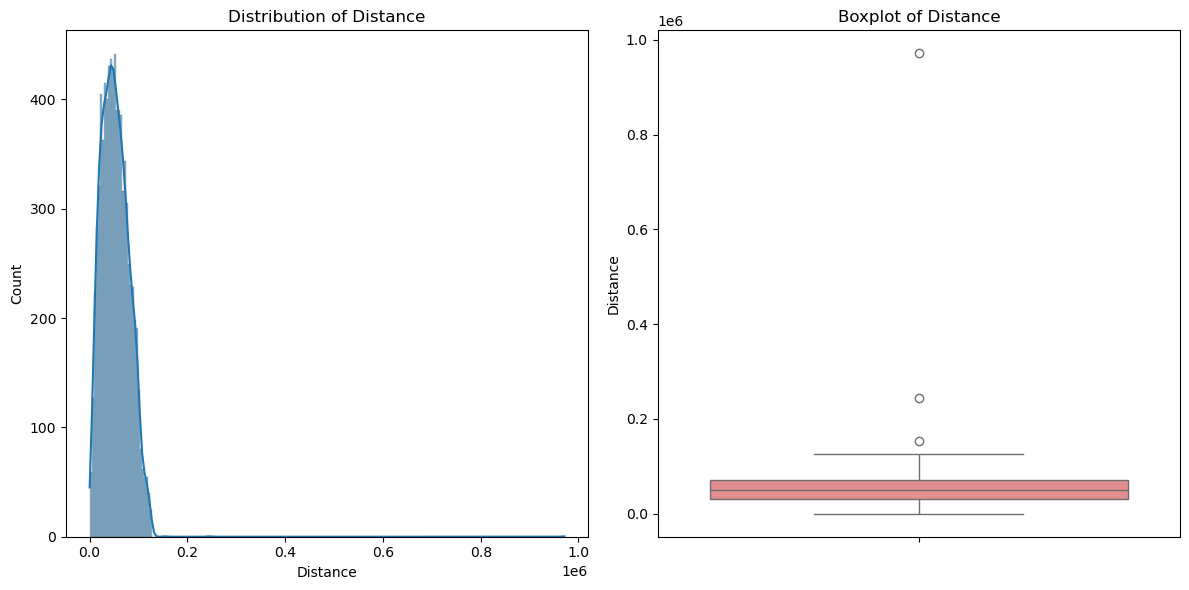

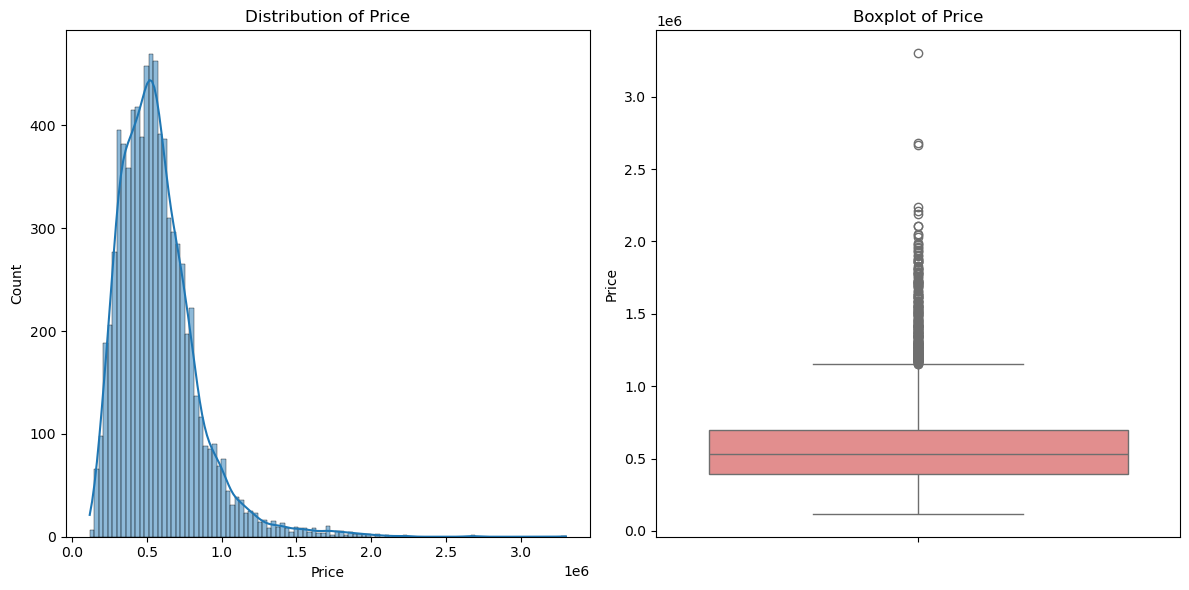

In [9]:
# Function to plot distribution and box plot
def plot_numerical(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

# Plot distribution and box plot for numerical features
numerical_features = ["Distance","Price"]
for feature in numerical_features:
    plot_numerical(df, feature)

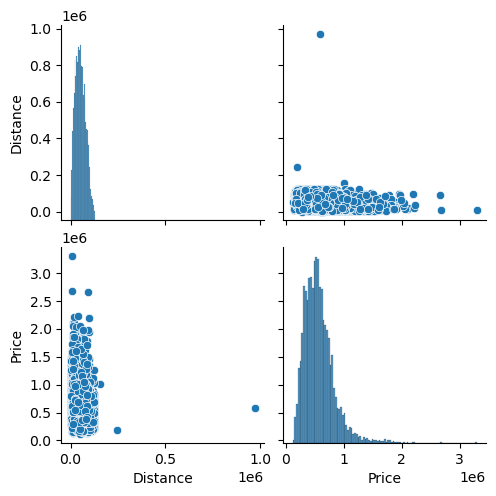

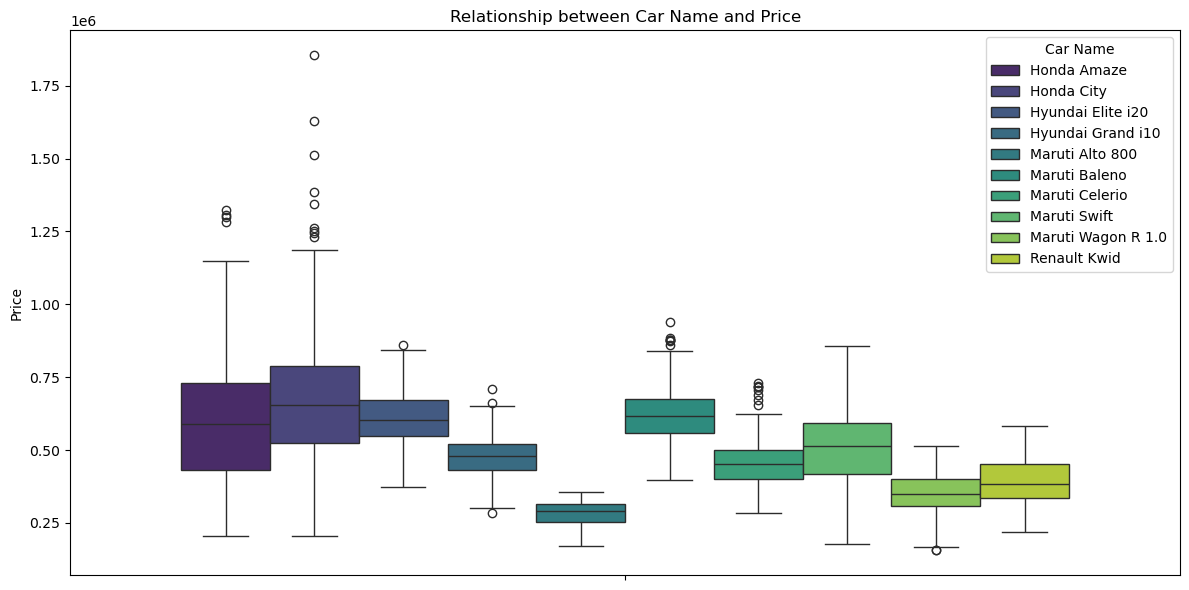

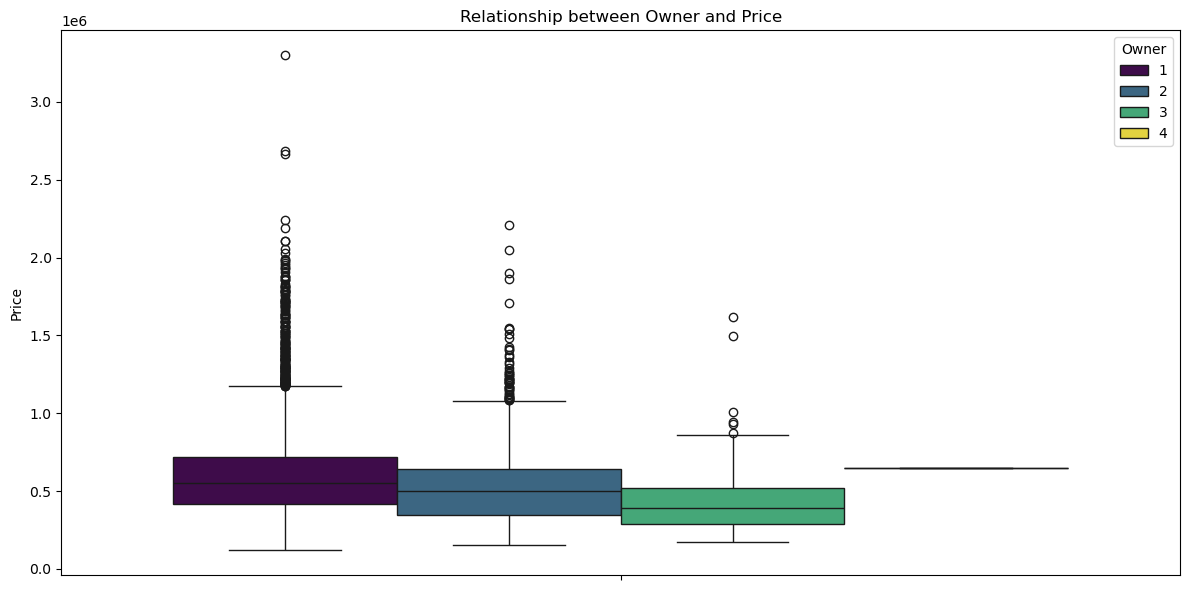

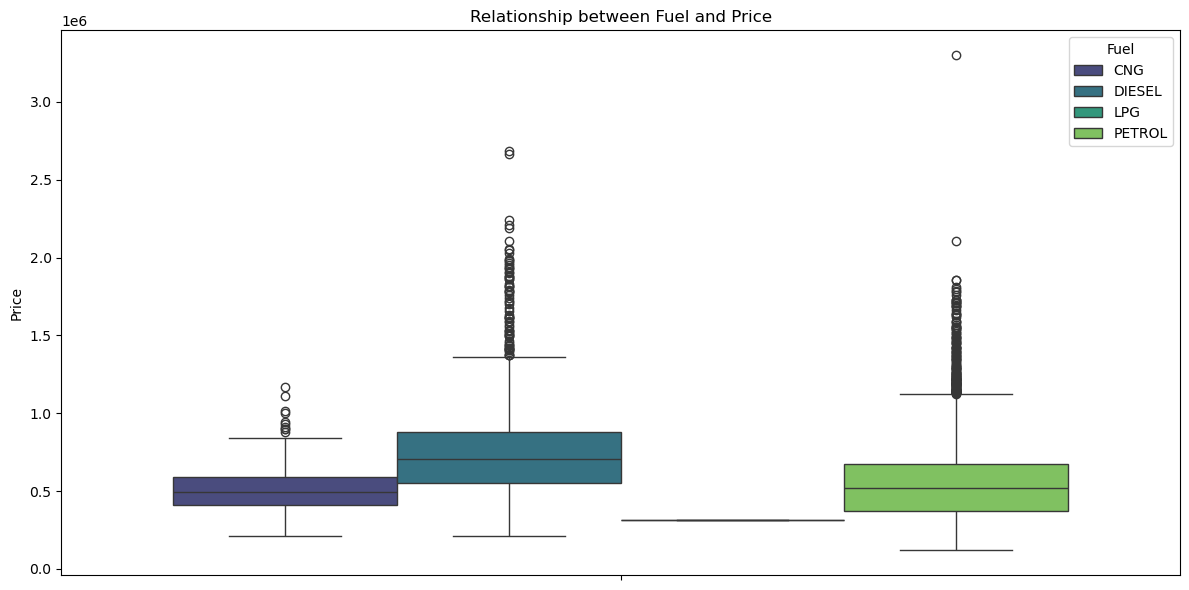

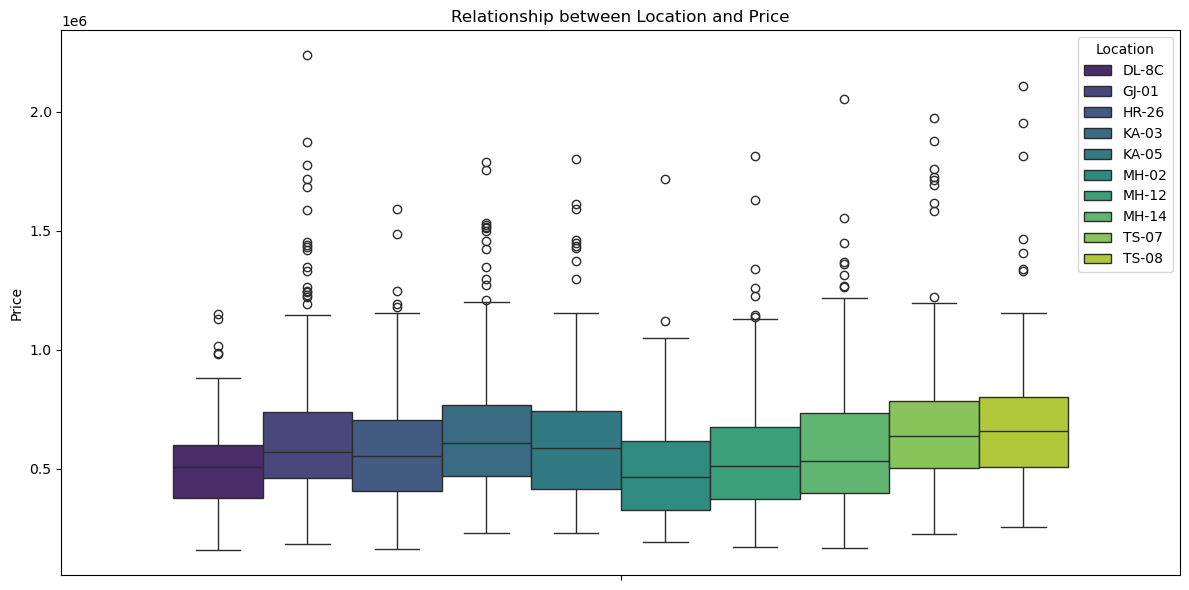

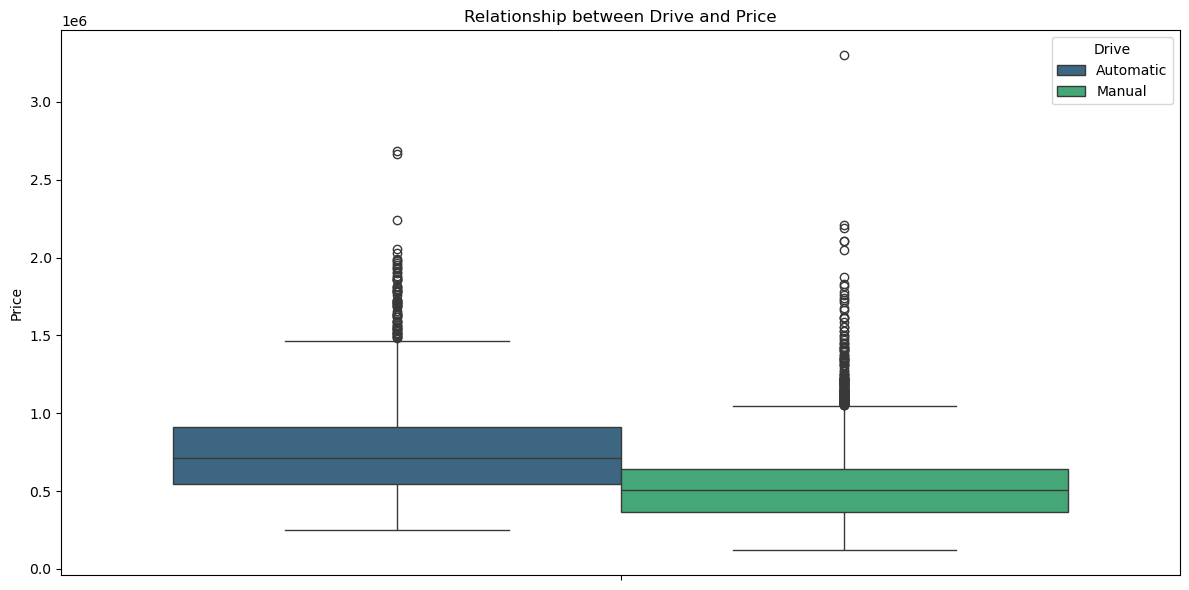

In [14]:
# Pairplot of numerical features
sns.pairplot(df[["Distance","Price"]])
plt.show()

# Explore relationships between categorical variables and price
def plot_categorical_vs_price(df, column, top_n = 10):
    df_sorted = df.sort_values(column, ascending=True)
    counts = df_sorted[column].value_counts().head(top_n).index
    df_filtered = df_sorted[df_sorted[column].isin(counts)]
    plt.figure(figsize=(12,6))
    sns.boxplot(hue=column,y="Price",data=df_filtered, palette="viridis")
    plt.title(f'Relationship between {column} and Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
#     plt.legend(labels)
    plt.show()

categorical_features = ['Car Name','Owner','Fuel','Location','Drive']
for feature in categorical_features:
     plot_categorical_vs_price(df, feature)

Here are my observations based on the plots:
1. Distance:

* Distribution: The distance is highly skewed to the right, with the vast majority of cars having relatively low mileage. There are some cars with significantly high distances, creating a very long tail.

* Boxplot: The boxplot shows a lot of outliers, indicating that some cars have very high mileage compared to the rest.

2. Price:

* Distribution: The distribution of prices is also skewed to the right, with a large number of cars clustered at the lower end of the price spectrum and a few outliers on the higher end.

* Boxplot: Similar to the distance, the boxplot for price also shows many outliers, suggesting the presence of very expensive cars in the data set.

3. Pairplot:

* Distance vs. Price: There's no clear linear relationship between Distance and Price from what we can see in this graph. This might indicate that the price of the car is influenced more by other variables, or perhaps there's a non-linear relationship.

4. Categorical Features vs. Price

* Car Name vs. Price: There is some variation in the price depending on the car name, some names seem to have a higher price than others. This will need to be explored further.

* Owner vs. Price: Seems like the number of previous owners might have an impact on the price. Cars with 0 owners are more expensive than the others.

* Fuel vs. Price: Cars with petrol and diesel seem to be more expensive than the others, but not by a large amount.

* Location vs. Price: There are some variations depending on the location, some are more expensive than others. This might be due to the type of cars that are more common in some locations than others.

* Drive vs. Price: Cars with Automatic transmission seem to be slightly more expensive than the others.